# Epidemics on networks 

We use the Python library ["Epidemics on Networks" developed by Kiss, Miller & Simon](https://github.com/springer-math/Mathematics-of-Epidemics-on-Networks).

The library must be installed using pip:

    pip install EoN
  

The library documentation is [available here](http://epidemicsonnetworks.readthedocs.io/en/latest/). 

In [1]:
import EoN
import networkx as nx
import numpy as np
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

Matplotlib is building the font cache; this may take a moment.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Epidemic threshold for homogeneous networks

We simulate the spread of an SIR on an Erdos-Renyi graph with constant recovery rate.

In [7]:
N = 10000
p = 0.002
G = nx.fast_gnp_random_graph(N, p)

In [8]:
nx.is_connected(G)

True

In [9]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 99584
Average degree:  19.9168


---
**For this network the epidemic threshold can be approximated as $\lambda_c = \frac{\mu}{\langle k \rangle}$**

In [10]:
mu = 0.2

In [11]:
avg_deg1 = 2 * len(G.edges) / N
lc = mu / avg_deg1
print(lc)

0.01004177377892031


**As expected for this network, we have $\langle k^2 \rangle \sim \langle k \rangle^2 + \langle k \rangle$**

In [12]:
sum_k2 = 0
for i in G.nodes():

    k = G.degree(i)
    sum_k2 += k * k

avg_k2 = sum_k2 / N
print(avg_k2)

416.0806


In [13]:
avg_deg1**2 + avg_deg1

416.59572224

### Simulations of an SIR process
We simulate 20 realizations of a SIR model for increasing values of $\lambda$ using the [fast_SIR function of EoN](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.fast_SIR.html?highlight=fast_SIR)

In [14]:
final_size = defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):

    for r in range(0, 20):

        t, S, I, R = EoN.fast_SIR(G, lambd, mu, rho=0.05)

        final_size[lambd].append(R[-1] / N)

In [15]:
homo_net_size = pd.DataFrame.from_dict(final_size)

In [16]:
homo_net_size

0.000100  0.000162  0.000264  0.000428  0.000695  0.001129  0.001833  \
0     0.0506    0.0514    0.0516    0.0515    0.0524    0.0572    0.0608   
1     0.0501    0.0506    0.0514    0.0523    0.0541    0.0548    0.0602   
2     0.0506    0.0506    0.0514    0.0521    0.0548    0.0552    0.0614   
3     0.0506    0.0507    0.0506    0.0523    0.0537    0.0569    0.0601   
4     0.0502    0.0510    0.0518    0.0526    0.0536    0.0557    0.0609   
5     0.0507    0.0512    0.0508    0.0516    0.0532    0.0562    0.0593   
6     0.0505    0.0507    0.0514    0.0522    0.0538    0.0563    0.0604   
7     0.0508    0.0507    0.0513    0.0523    0.0535    0.0561    0.0593   
8     0.0506    0.0506    0.0516    0.0516    0.0542    0.0554    0.0613   
9     0.0501    0.0504    0.0508    0.0519    0.0537    0.0551    0.0608   
10    0.0506    0.0508    0.0511    0.0511    0.0538    0.0568    0.0608   
11    0.0510    0.0506    0.0514    0.0515    0.0537    0.0558    0.0593   
12    0.0503    0.0503    0.0511    0.0522    0.0541    0.0562    0.0616   
13    0.0501    0.0508    0.0511    0.0517    0.0537    0.0544    0.0612   
14    0.0503    0.0507    0.0509    0.0523    0.0549    0.0560    0.0587   
15    0.0505    0.0505    0.0517    0.0517    0.0544    0.0567    0.0619   
16    0.0506    0.0506    0.0509    0.0519    0.0539    0.0569    0.0589   
17    0.0500    0.0507    0.0514    0.0525    0.0519    0.0572    0.0613   
18    0.0503    0.0506    0.0507    0.0525    0.0525    0.0572    0.0597   
19    0.0506    0.0516    0.0508    0.0518    0.0529    0.0564    0.0604   

    0.002976  0.004833  0.007848  0.012743  0.020691  0.033598  0.054556  \
0     0.0700    0.0835    0.1400    0.4589    0.7949    0.9320    0.9829   
1     0.0684    0.0938    0.1752    0.4232    0.7858    0.9344    0.9848   
2     0.0706    0.0855    0.1488    0.3979    0.7824    0.9336    0.9858   
3     0.0684    0.0861    0.1429    0.4395    0.7813    0.9360    0.9852   
4     0.0654    0.0922    0.1438    0.4822    0.7811    0.9369    0.9870   
5     0.0718    0.0867    0.1415    0.4270    0.7792    0.9354    0.9873   
6     0.0672    0.0921    0.1496    0.3933    0.7787    0.9303    0.9867   
7     0.0700    0.0932    0.1549    0.4483    0.7800    0.9315    0.9858   
8     0.0690    0.0890    0.1517    0.4168    0.7916    0.9378    0.9857   
9     0.0674    0.1011    0.1304    0.4228    0.7800    0.9312    0.9867   
10    0.0692    0.0893    0.1460    0.4395    0.7839    0.9300    0.9846   
11    0.0673    0.0869    0.1531    0.4438    0.7776    0.9413    0.9843   
12    0.0685    0.0913    0.1496    0.4670    0.7850    0.9379    0.9842   
13    0.0688    0.0858    0.1660    0.4371    0.7954    0.9359    0.9874   
14    0.0712    0.0856    0.1583    0.4135    0.7881    0.9309    0.9842   
15    0.0701    0.0880    0.1548    0.4127    0.7682    0.9292    0.9872   
16    0.0660    0.0886    0.1670    0.4257    0.7781    0.9356    0.9859   
17    0.0689    0.0939    0.1540    0.4175    0.7905    0.9329    0.9841   
18    0.0689    0.0831    0.1522    0.4397    0.7770    0.9420    0.9841   
19    0.0703    0.0853    0.1463    0.4229    0.7737    0.9395    0.9861   

    0.088587  0.143845  0.233572  0.379269  0.615848  1.000000  
0     0.9971    0.9997    1.0000       1.0       1.0       1.0  
1     0.9981    0.9996    0.9998       1.0       1.0       1.0  
2     0.9986    0.9999    1.0000       1.0       1.0       1.0  
3     0.9982    0.9999    1.0000       1.0       1.0       1.0  
4     0.9981    0.9997    1.0000       1.0       1.0       1.0  
5     0.9978    0.9999    1.0000       1.0       1.0       1.0  
6     0.9977    0.9998    0.9999       1.0       1.0       1.0  
7     0.9982    0.9998    1.0000       1.0       1.0       1.0  
8     0.9983    1.0000    1.0000       1.0       1.0       1.0  
9     0.9980    0.9999    0.9999       1.0       1.0       1.0  
10    0.9976    0.9998    1.0000       1.0       1.0       1.0  
11    0.9977    0.9996    1.00

Text(0.5, 0, '$\\lambda$')

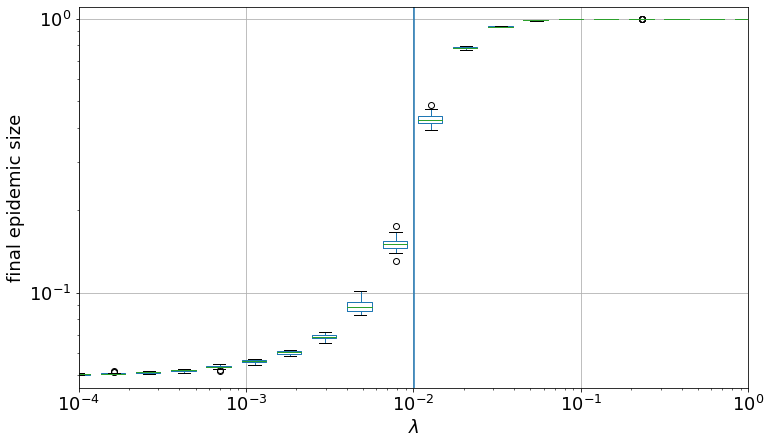

In [17]:
plt.figure(figsize=(12, 7))

homo_net_size.boxplot(
    positions=np.array(homo_net_size.columns),
    widths=np.array(homo_net_size.columns) / 3,
)

plt.vlines(x=lc, ymin=0.045, ymax=1.1)

plt.xscale("log")
plt.yscale("log")
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("final epidemic size", fontsize=18)
plt.xlabel("$\lambda$", fontsize=18)

## Epidemic threshold for Barabàsi-Albert model networks

In [20]:
N = 10000
AB = nx.barabasi_albert_graph(N, 10)

In [21]:
nx.is_connected(AB)

True

In [22]:
print(nx.info(AB))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 99900
Average degree:  19.9800


In [23]:
sum_k2 = 0
for i in AB.nodes():
    k = AB.degree(i)
    sum_k2 += k * k
avg_k2 = sum_k2 / N
print(avg_k2)

940.6206


In [24]:
avg_deg = 2 * len(AB.edges) / N
print(avg_deg)

19.98


**The threshold can be approximated as $\lambda_c \sim \mu \frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}$**

In [25]:
lambda_c = mu * avg_deg / (avg_k2 - avg_deg)
print(lambda_c)

0.0043404559824974055


In [27]:
lambda_c / lc

0.43223996856102154

### Simulations of an SIR process
We simulate 20 realizations of a SIR model for increasing values of $\lambda$

In [28]:
final_size_AB = defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 20):

        t, S, I, R = EoN.fast_SIR(AB, lambd, mu, rho=0.05)

        final_size_AB[lambd].append(R[-1] / N)

In [29]:
sf_net_size = pd.DataFrame.from_dict(final_size_AB)

In [30]:
sf_net_size.tail()

0.000100  0.000162  0.000264  0.000428  0.000695  0.001129  0.001833  \
15    0.0505    0.0507    0.0515    0.0528    0.0533    0.0570    0.0596   
16    0.0507    0.0507    0.0514    0.0526    0.0539    0.0585    0.0647   
17    0.0507    0.0506    0.0511    0.0519    0.0541    0.0572    0.0654   
18    0.0508    0.0505    0.0510    0.0519    0.0539    0.0552    0.0641   
19    0.0502    0.0510    0.0508    0.0525    0.0537    0.0555    0.0579   

    0.002976  0.004833  0.007848  0.012743  0.020691  0.033598  0.054556  \
15    0.0824    0.1225    0.2423    0.4803    0.7067    0.8738    0.9585   
16    0.0796    0.1165    0.2618    0.4837    0.7169    0.8759    0.9585   
17    0.0877    0.1462    0.2727    0.4790    0.7197    0.8774    0.9599   
18    0.0813    0.1444    0.2636    0.5012    0.7044    0.8731    0.9540   
19    0.0779    0.1541    0.2538    0.5092    0.7004    0.8743    0.9579   

    0.088587  0.143845  0.233572  0.379269  0.615848  1.000000  
15    0.9909    0.9986    0.9999       1.0       1.0       1.0  
16    0.9923    0.9988    0.9998       1.0       1.0       1.0  
17    0.9919    0.9987    0.9996       1.0       1.0       1.0  
18    0.9919    0.9991    1.0000       1.0       1.0       1.0  
19    0.9923    0.9991    0.9996       1.0       1.0       1.0

Text(0.5, 0, '$\\lambda$')

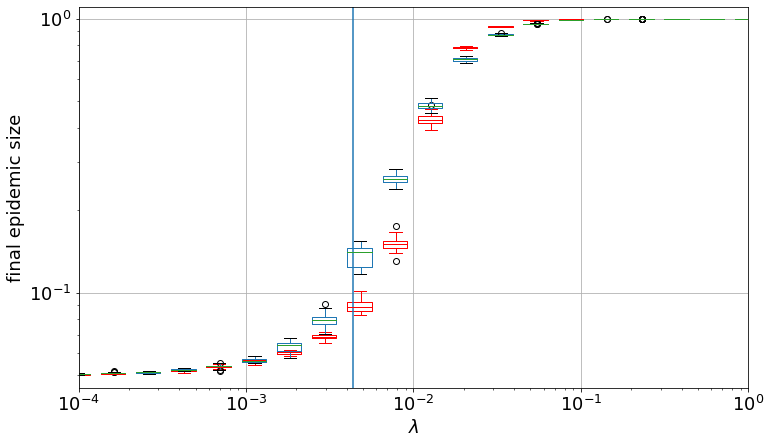

In [31]:
plt.figure(figsize=(12, 7))

homo_net_size.boxplot(
    positions=np.array(homo_net_size.columns),
    widths=np.array(homo_net_size.columns) / 3,
    color="r",
)

plt.vlines(x=lambda_c, ymin=0.04, ymax=1.1)
sf_net_size.boxplot(
    positions=np.array(sf_net_size.columns), widths=np.array(sf_net_size.columns) / 3
)

plt.yscale("log")
plt.xscale("log")
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("final epidemic size", fontsize=18)
plt.xlabel("$\lambda$", fontsize=18)

## Epidemic threshold for configuration model networks

We can use the configuration model to generate a network with a given power-law degree distribution. By setting $\gamma=2.1$, we expect to see more fluctuations in the degree distribution.

We create a function that samples from a power-law distribution between $k_{min}$ and $k_{max}$ with exponent $\gamma$

In [33]:
def get_activity(x0, x1, g):

    y = random.uniform(0, 1)

    e = g + 1.0

    a = ((x1**e - x0**e) * y + x0**e) ** (1.0 / e)

    return a

In [34]:
N = 10000
kmin = 2
kmax = N - 1
a = []
for i in range(N):
    act = get_activity(kmin, kmax, -2.1)

    a.append(int(round(act)))

# we need the sum of the degree sequence to be even to properly run the configuration model
if sum(a) % 2 == 0:
    G1 = nx.configuration_model(a)
else:
    a[-1] += 1
    G1 = nx.configuration_model(a)

In [35]:
nx.is_connected(G1)

True

In [36]:
print(nx.info(G1))

Name: 
Type: MultiGraph
Number of nodes: 10000
Number of edges: 65624
Average degree:  13.1248


In [37]:
G1 = nx.Graph(G1)

In [38]:
G1.remove_edges_from(nx.selfloop_edges(G1))

In [39]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 54022
Average degree:  10.8044


In [40]:
nx.is_connected(G1)

True

In [41]:
sum_k2 = 0
for i in G1.nodes():
    k = G1.degree(i)
    sum_k2 += k * k
avg_k2 = sum_k2 / N
print(avg_k2)

2428.7296


In [42]:
avg_deg = 2 * len(G1.edges) / N
print(avg_deg)

10.8044


In [43]:
lambda_c1 = mu * avg_deg / (avg_k2 - avg_deg)
print(lambda_c1)

0.000893691831327123


In [44]:
lc / lambda_c1

11.236282381599462

### Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$

In [46]:
final_size_conf = defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 20):

        t, S, I, R = EoN.fast_SIR(G1, lambd, mu, rho=0.05)

        final_size_conf[lambd].append(R[-1] / N)

In [47]:
conf_net_size = pd.DataFrame.from_dict(final_size_conf)

Text(0.5, 0, '$\\lambda$')

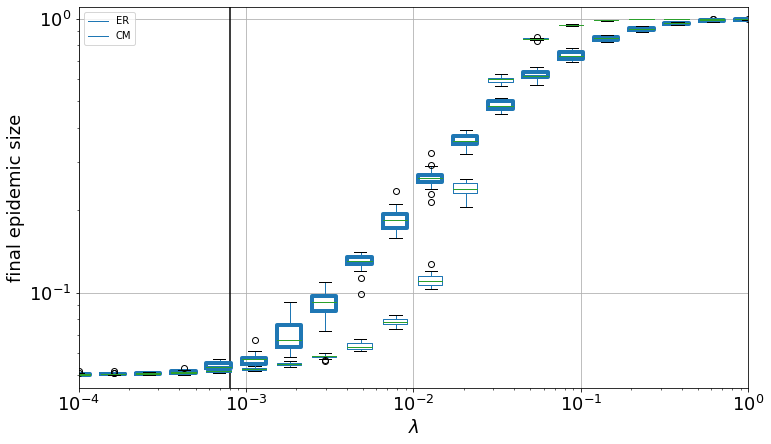

In [48]:
plt.figure(figsize=(12, 7))

boxprops1 = dict(linestyle="-", linewidth=4, color="b")

homo_net_size.boxplot(
    positions=np.array(homo_net_size.columns),
    widths=np.array(homo_net_size.columns) / 3,
)

conf_net_size.boxplot(
    positions=np.array(conf_net_size.columns),
    widths=np.array(conf_net_size.columns) / 3,
    boxprops=boxprops1,
)

plt.vlines(x=lambda_c1, ymin=0.04, ymax=1.1)
plt.legend(["ER", "CM"])
plt.yscale("log")
plt.xscale("log")
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("final epidemic size", fontsize=18)
plt.xlabel("$\lambda$", fontsize=18)